In [2]:
import numpy as np
import matplotlib.pyplot as plt

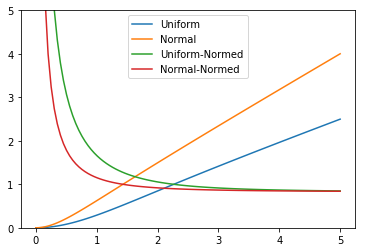

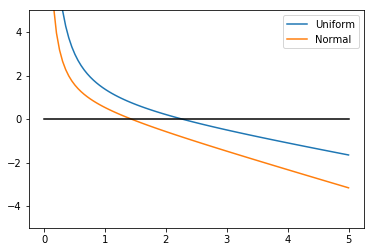

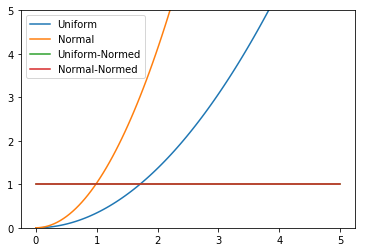

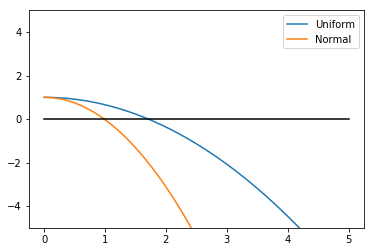

In [17]:
BS = 200
du = np.random.rand(BS)*2-1
dn = np.random.randn(BS)

samples = 100

def cov(u,v):
    muU = u.mean()
    muV = v.mean()
    return ((u-muU)*(v-muV)).mean()

sigs = np.linspace(0.0001, 5, samples)
data = np.zeros((samples, 4))
data2 = np.zeros((samples, 4))


for i, sig in enumerate(sigs):
    tu = du*sig
    tn = dn*sig
    
    ou = np.tanh(tu)
    on = np.tanh(tn)
    
    data[i, 0] = cov(tu, ou)
    data[i, 1] = cov(tn, on)
    
    tu = tu/data[i, 0]
    tn = tn/data[i, 1]
    
    ou = np.tanh(tu)
    on = np.tanh(tn)
    
    data[i, 2] = cov(tu, ou)
    data[i, 3] = cov(tn, on)
    
    
plt.plot(sigs, data[:,0], label='Uniform')
plt.plot(sigs, data[:,1], label='Normal')
plt.plot(sigs, data[:,2], label='Uniform-Normed')
plt.plot(sigs, data[:,3], label='Normal-Normed')
plt.ylim((0, 5))
plt.legend()
plt.show()

plt.plot(sigs, data[:,2] - data[:,0], label='Uniform')
plt.plot(sigs, data[:,3] - data[:,1], label='Normal')
plt.plot(sigs, np.zeros_like(sigs), 'k')
plt.ylim((-5, 5))
plt.legend()
plt.show()
    

# BN version
    
    
data = np.zeros((samples, 4))

for i, sig in enumerate(sigs):
    tu = du*sig
    tn = dn*sig
    
    data[i, 0] = cov(tu, tu)
    data[i, 1] = cov(tn, tn)
    
    tu = tu/np.sqrt(data[i, 0])
    tn = tn/np.sqrt(data[i, 1])
    
    data[i, 2] = cov(tu, tu)
    data[i, 3] = cov(tn, tn)
    
plt.plot(sigs, data[:,0], label='Uniform')
plt.plot(sigs, data[:,1], label='Normal')
plt.plot(sigs, data[:,2], label='Uniform-Normed')
plt.plot(sigs, data[:,3], label='Normal-Normed')
plt.ylim((0, 5))
plt.legend()
plt.show()

plt.plot(sigs, data[:,2] - data[:,0], label='Uniform')
plt.plot(sigs, data[:,3] - data[:,1], label='Normal')
plt.plot(sigs, np.zeros_like(sigs), 'k')
plt.ylim((-5, 5))
plt.legend()
plt.show()
    